# "[Spark] pyspark에서 Pandas API 사용하기"
> pandas, spark.DataFrame, pyspark.pandas 간 변환

- toc: true 
- badges: true
- comments: true
- categories: [Spark]

# pyspark에서 Pandas API 사용하기

그 동안 pyspark.pandas API가 있는 줄 모르고 spark.DataFrame 기준으로만 전처리를 했었다. 물론 추후 속도적인 측면도 테스트 해봐야 겠지만, 익숙한 python pandas 문법을 spark에서도 사용할 수 있다는 점이 장점인거 같다.

In [10]:
import os
import warnings; warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession

## Pandas on Spark Object 생성
- `pandas`, `spark.DataFrame`, `pyspark.pandas`간의 변환 command
- `sdf.to_pandas_on_spark()`: spark.DataFrame -> pyspark.pandas
- `spark.createDataFrame(df)`: pandas.DataFrame -> spark.DataFrame
- `ps.from_pandas(df)`: pandas -> pyspark.pandas

- pandas-on-Spark Series 생성

In [11]:
s = ps.Series([1, 3, 5, np.nan, 6, 8])

In [12]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- pandas-on-Spark DataFrame 생성

In [13]:
psdf = ps.DataFrame({
    'a': [1, 2, 3, 4, 5, 6],
    'b': [100, 200, 300, 400, 500, 600],
    'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60]
)

In [14]:
psdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


- pandas DataFrame으로부터 Spark DataFrame 생성

In [16]:
dates = pd.date_range('20130101', periods=6)

In [17]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [19]:
pdf

,A,B,C,D
2013-01-01,0.346299,0.946748,1.184695,-1.158578
2013-01-02,-0.133470,1.224787,-0.446594,0.482565
2013-01-03,0.748055,0.199681,-0.542991,0.866088
2013-01-04,-0.744655,1.431218,0.513117,-0.649905
2013-01-05,-0.339120,-0.695819,-1.428132,-1.526980
2013-01-06,0.726483,-1.131556,0.242745,1.488364


In [20]:
psdf = ps.from_pandas(pdf)
type(psdf)

pyspark.pandas.frame.DataFrame

In [21]:
spark = SparkSession.builder.getOrCreate()
sdf = spark.createDataFrame(pdf)
sdf.show()

+--------------------+-------------------+-------------------+-------------------+
|                   A|                  B|                  C|                  D|
+--------------------+-------------------+-------------------+-------------------+
|  0.3462987999403194| 0.9467481831984389| 1.1846947637320713|-1.1585782610012703|
|-0.13346994375082502| 1.2247869095176753| -0.446593621291369| 0.4825652775216099|
|  0.7480549772449115|  0.199681455812404|-0.5429905711786277| 0.8660881736263012|
| -0.7446546017705188| 1.4312177915894633| 0.5131170380144356|-0.6499052358759891|
| -0.3391197127262108|-0.6958191071345965|-1.4281317658506953|-1.5269801796563447|
|  0.7264826865156339|-1.1315560289935476|0.24274492407843978| 1.4883641187609775|
+--------------------+-------------------+-------------------+-------------------+



- Spark DataFrame으로부터 pandas-on-Spark DataFrame 생성

In [22]:
psdf = sdf.to_pandas_on_spark()

In [23]:
psdf

,A,B,C,D
0,0.346299,0.946748,1.184695,-1.158578
1,-0.133470,1.224787,-0.446594,0.482565
2,0.748055,0.199681,-0.542991,0.866088
3,-0.744655,1.431218,0.513117,-0.649905
4,-0.339120,-0.695819,-1.428132,-1.526980
5,0.726483,-1.131556,0.242745,1.488364


In [24]:
psdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [25]:
psdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [26]:
psdf.to_numpy()

array([[ 0.3462988 ,  0.94674818,  1.18469476, -1.15857826],
       [-0.13346994,  1.22478691, -0.44659362,  0.48256528],
       [ 0.74805498,  0.19968146, -0.54299057,  0.86608817],
       [-0.7446546 ,  1.43121779,  0.51311704, -0.64990524],
       [-0.33911971, -0.69581911, -1.42813177, -1.52698018],
       [ 0.72648269, -1.13155603,  0.24274492,  1.48836412]])

In [27]:
psdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.100599,0.329177,-0.079527,-0.083074
std,0.605622,1.058219,0.918870,1.204421
min,-0.744655,-1.131556,-1.428132,-1.526980
25%,-0.339120,-0.695819,-0.542991,-1.158578
50%,-0.133470,0.199681,-0.446594,-0.649905
75%,0.726483,1.224787,0.513117,0.866088
max,0.748055,1.431218,1.184695,1.488364


In [28]:
psdf.T

,0,1,2,3,4,5
A,0.346299,-0.133470,0.748055,-0.744655,-0.339120,0.726483
B,0.946748,1.224787,0.199681,1.431218,-0.695819,-1.131556
C,1.184695,-0.446594,-0.542991,0.513117,-1.428132,0.242745
D,-1.158578,0.482565,0.866088,-0.649905,-1.526980,1.488364


In [30]:
psdf.sort_index(ascending=False)

,A,B,C,D
5,0.726483,-1.131556,0.242745,1.488364
4,-0.339120,-0.695819,-1.428132,-1.526980
3,-0.744655,1.431218,0.513117,-0.649905
2,0.748055,0.199681,-0.542991,0.866088
1,-0.133470,1.224787,-0.446594,0.482565
0,0.346299,0.946748,1.184695,-1.158578


In [31]:
psdf.sort_values(by='B')

,A,B,C,D
5,0.726483,-1.131556,0.242745,1.488364
4,-0.339120,-0.695819,-1.428132,-1.526980
2,0.748055,0.199681,-0.542991,0.866088
0,0.346299,0.946748,1.184695,-1.158578
1,-0.133470,1.224787,-0.446594,0.482565
3,-0.744655,1.431218,0.513117,-0.649905


## Missing Data

- Pandas API on Spark는 missing data를 표현하기 위해 `np.nan`을 사용

In [32]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [34]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [35]:
psdf1 = ps.from_pandas(pdf1)

In [36]:
psdf1

,A,B,C,D,E
2013-01-01,0.346299,0.946748,1.184695,-1.158578,1.0
2013-01-02,-0.133470,1.224787,-0.446594,0.482565,1.0
2013-01-03,0.748055,0.199681,-0.542991,0.866088,NaN
2013-01-04,-0.744655,1.431218,0.513117,-0.649905,NaN


- missing data 삭제

In [40]:
psdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.346299,0.946748,1.184695,-1.158578,1.0
2013-01-02,-0.133470,1.224787,-0.446594,0.482565,1.0


- missing data 채우기

In [41]:
psdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.346299,0.946748,1.184695,-1.158578,1.0
2013-01-02,-0.133470,1.224787,-0.446594,0.482565,1.0
2013-01-03,0.748055,0.199681,-0.542991,0.866088,5.0
2013-01-04,-0.744655,1.431218,0.513117,-0.649905,5.0


## Operations

- 기술 통계

In [42]:
psdf.mean()

A    0.100599
B    0.329177
C   -0.079527
D   -0.083074
dtype: float64

### Spark Configurations

In [43]:
prev = spark.conf.get("spark.sql.execution.arrow.pyspark.enabled")  # Keep its default value.
ps.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.

In [44]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", True)
%timeit ps.range(300000).to_pandas()

285 ms ± 93.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", False)
%timeit ps.range(300000).to_pandas()

702 ms ± 67.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
ps.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", prev)  # Set its default value back.

## Grouping

In [47]:
psdf = ps.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [48]:
psdf

,A,B,C,D
0,foo,one,0.437018,2.192919
1,bar,one,0.429485,-0.560230
2,foo,two,-0.171649,0.048277
3,bar,three,-0.506166,-2.782998
4,foo,two,-0.038123,1.601338
5,bar,two,0.438333,-0.525144
6,foo,one,0.885746,0.038302
7,foo,three,-0.135220,-0.495829


In [49]:
psdf.groupby('A').sum()

,C,D
A,,
foo,0.977771,3.385007
bar,0.361653,-3.868372


In [50]:
psdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo two   -0.209772  1.649615
bar two    0.438333 -0.525144
foo one    1.322764  2.231221
bar one    0.429485 -0.560230
    three -0.506166 -2.782998
foo three -0.135220 -0.495829

## Plotting

In [51]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [52]:
psser = pd.Series(pser)

In [53]:
psser = psser.cummax()

<AxesSubplot:>

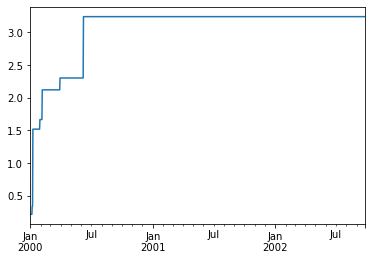

In [55]:
psser.plot()